In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [153]:
file = pd.read_csv('for_visulisation.csv')
file.shape

diseases_list = set(list(file.disease))
print(diseases_list)

{'MUMPS', 'POLIO', 'MEASLES', 'PERTUSSIS', 'HEPATITIS A', 'RUBELLA'}


## Disease Plot
- Hepatitis A
- Pertusis
- Measles
- Mumps
- Polio
- Rubella
##### Plotting it With the no of cases

In [154]:
def get_data(disease_name):
    the_ds_data = file.loc[file['disease'] == disease_name]
    the_ds_data.head()
    tf = the_ds_data.filter(['state_name','state','cases'], axis=1)
    tf.cases = tf.cases.astype(int)
    the_ds_data_2 = tf.groupby(['state_name','state']).sum().reset_index()
    the_ds_data_2['text'] = the_ds_data_2['state_name']+'<br>'+'Total case:'+str(the_ds_data_2['cases'])
    return the_ds_data_2

def get_data_with_year(disease_name):
    the_ds_data = file.loc[file['disease'] == disease_name]
    tf = the_ds_data.filter(['Year','cases'], axis=1)
    tf.cases = tf.cases.astype(int)
    the_ds_data_2 = tf.groupby(['Year']).sum().reset_index()
    return the_ds_data_2


In [155]:
#Hepatitis A
import plotly.plotly as py
import plotly.graph_objs as go
a = get_data('HEPATITIS A')
trace0 = go.Bar(
    x = a['state_name'],
    y = a['cases'],
    text = a['text'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Hepatitis A Report ALL YEARS (1960-2011)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [156]:
#Pertusis
import plotly.plotly as py
import plotly.graph_objs as go
a = get_data('PERTUSSIS')
trace0 = go.Bar(
    x = a['state_name'],
    y = a['cases'],
    text = a['text'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='PERTUSIS Report ALL YEARS(1960-2011)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')


In [157]:
#POLIO
import plotly.plotly as py
import plotly.graph_objs as go
a = get_data('POLIO')
trace0 = go.Bar(
    x = a['state_name'],
    y = a['cases'],
    text = a['text'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='POLIO Report ALL YEARS(1960-2011)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [158]:
#MEASLES
import plotly.plotly as py
import plotly.graph_objs as go
a = get_data('MEASLES')
trace0 = go.Bar(
    x = a['state_name'],
    y = a['cases'],
    text = a['text'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='MEASLES Report ALL YEARS(1960-2011)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [159]:
#RUBELLA
import plotly.plotly as py
import plotly.graph_objs as go
a = get_data('RUBELLA')
trace0 = go.Bar(
    x = a['state_name'],
    y = a['cases'],
    text = a['text'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='RUBELLA Report ALL YEARS(1960-2011)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [160]:
import plotly.plotly as py
import plotly.graph_objs as go

title = 'ALL CONTAGIOUS DISEASES YEAR WISE ALL OVER USA'

labels = ['HEPATITIS A','PERTUSSIS','MEASLES','MUMPS']

colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']
mode_size = [12, 8, 8, 8]

line_size = [4, 2, 2, 2]

x_data = [list(get_data_with_year(f)['Year']) for f in diseases_list]
   
y_data = [get_data_with_year(f)['cases'] for f in diseases_list]

traces = []

for i in range(0, 4):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    traces.append(go.Scatter(
        x=[x_data[i][0], x_data[i][len(x_data)-1]],
        y=[y_data[i][0], y_data[i][len(y_data)-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=10,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + '{}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=11),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[len(y_data)-1],
                                  xanchor='left', yanchor='middle',
                                  text='{}'.format(y_trace[len(x_data)-1]),
                                  font=dict(family='Arial',
                                            size=11),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=11,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='news-source')

## No of Cases of each disease VS Population Over the years


In [161]:
def get_data_with_year(disease_name):
    pd.options.display.float_format = '{:,.4f}'.format
    pop = pd.read_csv('Population_statistics.csv')
    the_ds_data = file.loc[file['disease'] == disease_name]
    tf = the_ds_data.filter(['Year','cases'], axis=1)
    tf.cases = tf.cases.astype('int32')
    the_ds_data_2 = tf.groupby(['Year']).sum().reset_index()
    pop.columns=['Year','population']
    result = pd.merge(the_ds_data_2,pop,on = ['Year'])
    result['cases_per_pop'] = (result['cases']/result['population'])*100
    return result


In [162]:
import plotly.plotly as py
import plotly.graph_objs as go

title = 'CASES PER POPULATION EACH YEAR '

labels = diseases_list
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)', 'rgb(24,67,178)', 'rgb(34,67,89)']
mode_size = [12, 8, 8, 8, 8, 8]

line_size = [4, 2, 2, 2, 2, 2]

x_data = [list(get_data_with_year(f)['Year']) for f in diseases_list]
   
y_data = [list(np.around(get_data_with_year(f)['cases_per_pop'],4)) for f in diseases_list]

traces = []

for i in range(0, 6):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    traces.append(go.Scatter(
        x=[x_data[i][0], x_data[i][len(x_data)-1]],
        y=[y_data[i][0], y_data[i][len(y_data)-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=10,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False
)

annotations = []

# Adding labels
for (y_trace, label, color) in (zip(y_data, labels, colors)):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + '{}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=11),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[len(y_data)-1],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[len(x_data)-1]),
                                  font=dict(family='Arial',
                                            size=11),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=11,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='news-source')

## Disease varying with temperature
- Plotting avg temp with cases

In [163]:
temp_modified_file = pd.read_csv('for_temp_visualization.csv')
temp_file = pd.read_excel('TemperaturesByState.xlsx')

In [164]:
temp_file.head()


,index,Date,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,0,1900-01-01,43.3148,0.5370,Alabama,United States
1,0,1900-01-02,43.7414,0.5200,Alabama,United States
2,0,1900-01-03,52.1834,0.3720,Alabama,United States
3,0,1900-01-04,62.7854,0.3130,Alabama,United States
4,0,1900-01-05,70.3598,0.3500,Alabama,United States


In [165]:
temp_modified_file.head()

,Unnamed: 0,week,state,state_name,disease,cases,incidence_per_capita,LastDayWeek,MonthMax,Year,MonthName,t_avg,tavg_anomaly
0,0,196601,AL,alabama,HEPATITIS A,5,0.1400,1966-01-01,1,1966,January,40.4798,0.2350
1,1,196601,AL,alabama,RUBELLA,7,0.2000,1966-01-01,1,1966,January,40.4798,0.2350
2,2,196601,AR,arkansas,HEPATITIS A,11,0.5800,1966-01-01,1,1966,January,35.2310,0.2250
3,3,196601,AR,arkansas,MEASLES,2,0.1100,1966-01-01,1,1966,January,35.2310,0.2250
4,4,196601,AZ,arizona,HEPATITIS A,6,0.3700,1966-01-01,1,1966,January,37.9076,0.2850


In [189]:
def state_temp_vary(state_name):
    the_temp_data = temp_file.loc[temp_file['State'] == state_name]
    the_temp_data.head()
    
    tf = the_temp_data.filter(['State','AverageTemperature','Date'], axis=1)
    tf['Year'] = pd.DatetimeIndex(tf['Date']).year()
    tf.AverageTemperature = tf.AverageTemperature.astype('float32')
    tf.
    tf = tf.groupby(['Year']).mean().reset_index()
    return tf

In [190]:
#view temperature graph variation of each state year wise
state_temp_vary('Alabama')

TypeError: 'Int64Index' object is not callable

# Correlation Matrix


In [167]:
correlation_file = pd.read_csv('for_temp_visualization.csv')
correlation_file.head()

,Unnamed: 0,week,state,state_name,disease,cases,incidence_per_capita,LastDayWeek,MonthMax,Year,MonthName,t_avg,tavg_anomaly
0,0,196601,AL,alabama,HEPATITIS A,5,0.1400,1966-01-01,1,1966,January,40.4798,0.2350
1,1,196601,AL,alabama,RUBELLA,7,0.2000,1966-01-01,1,1966,January,40.4798,0.2350
2,2,196601,AR,arkansas,HEPATITIS A,11,0.5800,1966-01-01,1,1966,January,35.2310,0.2250
3,3,196601,AR,arkansas,MEASLES,2,0.1100,1966-01-01,1,1966,January,35.2310,0.2250
4,4,196601,AZ,arizona,HEPATITIS A,6,0.3700,1966-01-01,1,1966,January,37.9076,0.2850


In [168]:
filtered_table = correlation_file.filter(['cases','incidence_per_capita','t_avg','tavg_anomaly','Year'])
filtered_table.head()

,cases,incidence_per_capita,t_avg,tavg_anomaly,Year
0,5,0.1400,40.4798,0.2350,1966
1,7,0.2000,40.4798,0.2350,1966
2,11,0.5800,35.2310,0.2250,1966
3,2,0.1100,35.2310,0.2250,1966
4,6,0.3700,37.9076,0.2850,1966


In [169]:
filtered_table.corr(method='pearson')


,cases,incidence_per_capita,t_avg,tavg_anomaly,Year
cases,1.0000,0.5751,0.0163,0.0213,-0.2592
incidence_per_capita,0.5751,1.0000,-0.0425,0.0599,-0.2568
t_avg,0.0163,-0.0425,1.0000,0.1140,-0.0135
tavg_anomaly,0.0213,0.0599,0.1140,1.0000,-0.2185
Year,-0.2592,-0.2568,-0.0135,-0.2185,1.0000


In [170]:
filtered_table.corr(method='spearman')


,cases,incidence_per_capita,t_avg,tavg_anomaly,Year
cases,1.0000,0.7905,-0.0035,0.0704,-0.4531
incidence_per_capita,0.7905,1.0000,-0.0820,0.1388,-0.5491
t_avg,-0.0035,-0.0820,1.0000,0.1310,-0.0158
tavg_anomaly,0.0704,0.1388,0.1310,1.0000,-0.1948
Year,-0.4531,-0.5491,-0.0158,-0.1948,1.0000


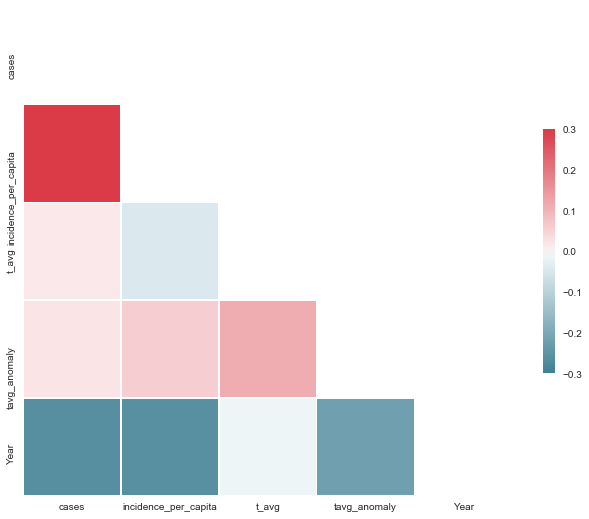

In [171]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

corr = filtered_table.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [172]:
correlation_population = get_data_with_year('HEPATITIS A')
correlation_population.head()

,Year,cases,population,cases_per_pop
0,1966,32416,196560338,0.0165
1,1967,38280,198712056,0.0193
2,1968,45204,200706052,0.0225
3,1969,46012,202676946,0.0227
4,1970,55188,205052174,0.0269


In [173]:
correlation_population.corr(method='pearson')

,Year,cases,population,cases_per_pop
Year,1.0000,-0.8989,0.9971,-0.9027
cases,-0.8989,1.0000,-0.8841,0.9956
population,0.9971,-0.8841,1.0000,-0.8830
cases_per_pop,-0.9027,0.9956,-0.8830,1.0000
